# Visualizing Simulation Data
How does the simulation data actually look like? How does the change in mu_a or the change in thickness affect the intensitites at different SDDs, calculated at different depths? We only change one parameter and keep the rest 3 fixed and see how the intensities change


In [5]:
import seaborn as sns
from inverse_modelling_tfo.data import generate_data_loaders, normalize_zero_mean, interpolate_exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Load Data
data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/data/intensity/test_data.pkl')
print(len(data))    # Length sanity check
data = interpolate_exp(data, weights=[1, -4])
print(len(data))    # Length sanity check
# data = normalize_zero_mean(data)
data.head(10)

228000
228000


,SDD,Intensity,Wave Int,Uterus Thickness,Maternal Wall Thickness,Maternal Mu_a,Fetal Mu_a,Interpolated Intensity
0,10,3.607995e+06,2.0,6.0,8.0,0.005,0.05,3.570760e+06
1,15,4.764061e+05,2.0,6.0,8.0,0.005,0.05,4.698751e+05
2,19,8.680096e+04,2.0,6.0,8.0,0.005,0.05,1.001862e+05
3,24,1.666751e+04,2.0,6.0,8.0,0.005,0.05,1.580347e+04
4,29,3.162629e+03,2.0,6.0,8.0,0.005,0.05,2.705640e+03
5,34,6.383186e+02,2.0,6.0,8.0,0.005,0.05,4.960558e+02
6,38,1.153435e+02,2.0,6.0,8.0,0.005,0.05,1.329341e+02
7,43,2.318906e+01,2.0,6.0,8.0,0.005,0.05,2.665280e+01
8,48,4.419708e+00,2.0,6.0,8.0,0.005,0.05,5.511484e+00
9,53,8.987256e-01,2.0,6.0,8.0,0.005,0.05,1.159801e+00


In [6]:
parameter_names = ['Maternal Mu_a', 'Fetal Mu_a', 'Maternal Wall Thickness', 'Uterus Thickness']
for parameter in parameter_names:
    print(parameter, ' unique values ', pd.unique(data[parameter]))

Maternal Mu_a  unique values  [0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095]
Fetal Mu_a  unique values  [0.05  0.055 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095]
Maternal Wall Thickness  unique values  [ 8. 32. 26. 16. 30. 14. 18.  6. 36. 10. 12.  2. 38. 20.  4. 22. 28. 24.
 34.]
Uterus Thickness  unique values  [6. 5. 7.]


## Changing Uterus Thickness

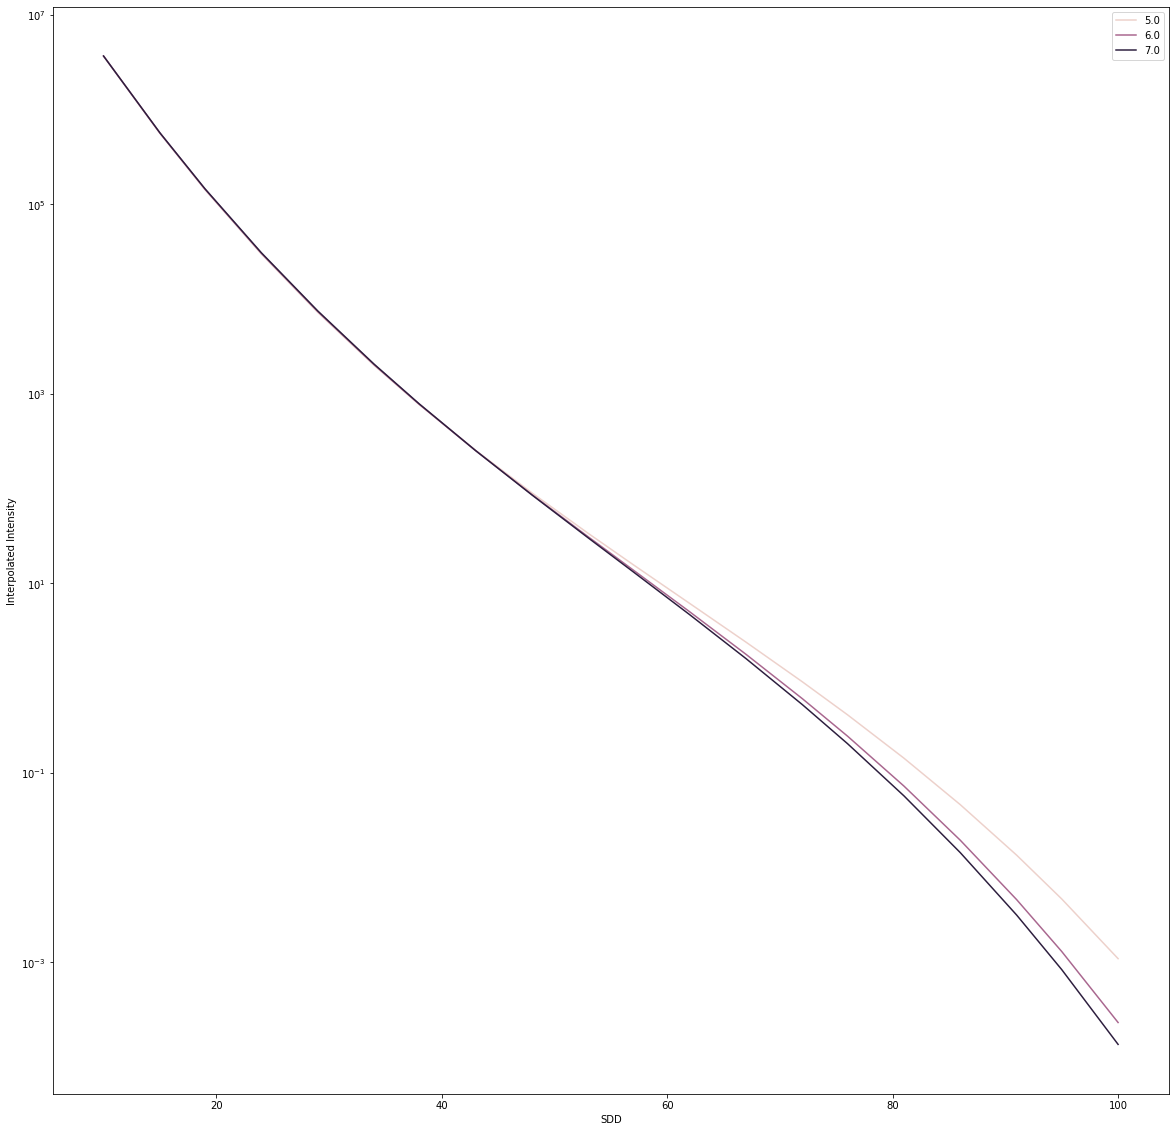

In [7]:
selected_data = data[(data['Wave Int'] == 1.0) & (data['Maternal Wall Thickness'] == 8.0) & (data['Maternal Mu_a'] == 0.005) & (data['Fetal Mu_a'] == 0.05)]
plt.figure(figsize=(20, 20))
sns.lineplot(data=selected_data, x='SDD', y='Interpolated Intensity', hue='Uterus Thickness')
plt.yscale('log')
plt.legend()

# Changing Maternal Wall Thickness

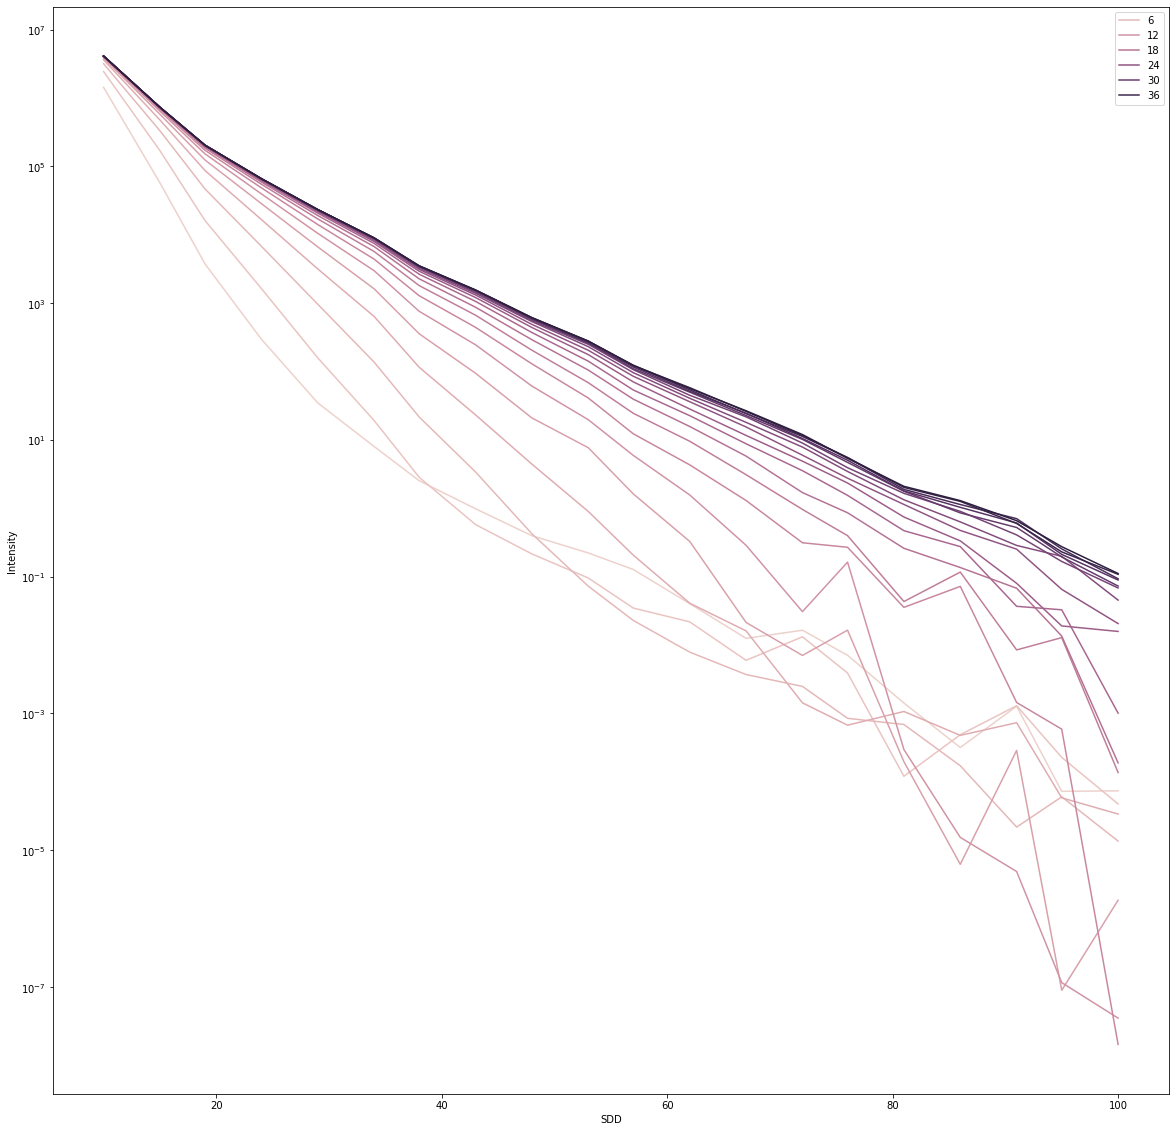

In [9]:
selected_data = data[(data['Wave Int'] == 2.0) & (data['Uterus Thickness'] == 6.0) & (data['Maternal Mu_a'] == 0.005) & (data['Fetal Mu_a'] == 0.05)]
plt.figure(figsize=(20, 20))
sns.lineplot(data=selected_data, x='SDD', y='Intensity', hue='Maternal Wall Thickness')
plt.yscale('log')
plt.legend()